In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import math

from core.features import Features
from core.preproccesing import normalization, dims_reduction, split_by_blocks
from core.visualization import plot_pca

from core.measurement import (
    Unattacked, 
    LO_Intesity_Attack,
    Calibration_Attack,
    Saturation_Attack,
    Hybrid_Attack,
    Hybrid_Attack2
    )
from core.constants import (
    ATTENUATION_VALUES,
    NUM_SAMPLES,
    NUM_BLOCKS,
    SHOT_NOISE as N0,
)

In [30]:
attenuation_coefs = np.array(ATTENUATION_VALUES)
samples = np.array([int(NUM_SAMPLES * 0.9), int(NUM_SAMPLES * 0.1)])


print(f'ATTENUATION_VALUES: {attenuation_coefs} \t SAMPLES: {samples}')

ATTENUATION_VALUES: [1.    0.001] 	 SAMPLES: [9000000 1000000]



Compute and generate features from unattacked quantum key distribution samples.

This script performs the following steps:
1. Instantiate the Unattacked class with given attenuation coefficients and samples, then obtain quadrature values.
2. Split the unattacked quadrature values into specified number of blocks.
3. Generate features from the split blocks.

Variables:
1. y_unattacked (np.ndarray): Quadrature values from the unattacked samples.
2. blocks_unattacked (np.ndarray): List of blocks obtained from splitting quadrature values.
3. features_unattacked (np.ndarray): DataFrame of generated features from the unattacked blocks.


In [31]:
y_unattacked = Unattacked(attenuation_coefs=attenuation_coefs, samples=samples).quadrature_values()

blocks_unattacked = split_by_blocks(y_unattacked, NUM_BLOCKS)

features_unattacked = Features(blocks_unattacked).generate()

features_unattacked

array([[ 1.26626274e-02,  1.00252295e+00,  9.99099115e+06,
         3.94010006e-01],
       [ 1.57668366e-02,  9.84989309e-01,  9.83369259e+06,
         4.02982876e-01],
       [ 1.93181385e-02,  1.02884411e+00,  9.94397315e+06,
         4.18612281e-01],
       ...,
       [ 1.11266463e-02,  1.00929093e+00,  1.00150140e+07,
         4.10934476e-01],
       [ 4.89058142e-04,  1.00200924e+00,  1.00084464e+07,
         4.02741578e-01],
       [-2.03657718e-03,  1.02660872e+00,  1.01399509e+07,
         4.01104455e-01]])

The algorithm is similar to the case without attacks

In [32]:
k_loia = 0.95 # lo attenuation coef

y_LOIA = LO_Intesity_Attack(attenuation_coefs=attenuation_coefs, samples=samples, k_loia=k_loia).quadrature_values()

blocks_unattacked = split_by_blocks(y_LOIA, NUM_BLOCKS)

features_LOIA = Features(blocks_unattacked, k_loia).generate()

features_LOIA

array([[ 1.39272429e-03,  9.73872966e-01,  9.44935884e+06,
         3.79917056e-01],
       [ 1.30128960e-02,  9.96546943e-01,  9.59153678e+06,
         4.01354253e-01],
       [ 1.43009710e-02,  9.58443060e-01,  9.80415550e+06,
         3.81734972e-01],
       ...,
       [-1.06209197e-02,  9.69099788e-01,  9.29678987e+06,
         3.56362463e-01],
       [-2.03288324e-02,  9.91510689e-01,  9.31658803e+06,
         3.77665079e-01],
       [-1.28845183e-02,  9.79250677e-01,  9.53167396e+06,
         3.70164476e-01]])

The algorithm is similar to the case without attacks

In [33]:
k_calib = 1 # default value

y_calib = Calibration_Attack(attenuation_coefs=attenuation_coefs, samples=samples, k_calib=k_calib).quadrature_values()

blocks_calib = split_by_blocks(y_calib, NUM_BLOCKS)

features_calib = Features(blocks_calib, k_calib).generate()

features_calib

array([[-8.72011608e-03,  8.83430468e-01,  1.01581938e+07,
         2.94522253e-01],
       [-6.30872344e-03,  8.62669386e-01,  1.00913836e+07,
         2.82172076e-01],
       [ 3.84924225e-03,  8.69114512e-01,  1.00498813e+07,
         3.05912356e-01],
       ...,
       [-1.24486923e-02,  8.55263699e-01,  1.00242544e+07,
         2.97566984e-01],
       [ 3.74380117e-03,  8.77626562e-01,  1.00588292e+07,
         3.05843040e-01],
       [ 5.64955983e-03,  8.77422368e-01,  1.01734654e+07,
         3.02216101e-01]])

The algorithm is similar to the case without attacks

In [34]:
a_sat = 20 * math.sqrt(N0)
delta_sat = 19.5 * math.sqrt(N0)

y_sat = Saturation_Attack(attenuation_coefs=attenuation_coefs,samples=samples, alpha_sat=a_sat, delta=delta_sat).quadrature_values()

blocks_sat = split_by_blocks(y_sat, NUM_BLOCKS)

features_sat = Features(blocks_sat).generate()

features_sat

array([[1.20456104e+01, 5.23196089e-01, 1.00415695e+07, 2.18310873e-01],
       [1.20388593e+01, 5.42400828e-01, 1.00362190e+07, 2.02538393e-01],
       [1.20472227e+01, 5.31546859e-01, 9.97098796e+06, 2.20778968e-01],
       ...,
       [1.20419344e+01, 5.29502012e-01, 1.00210295e+07, 2.04005604e-01],
       [1.20529603e+01, 5.17777788e-01, 1.01659590e+07, 2.12137724e-01],
       [1.20510914e+01, 5.25141110e-01, 1.00853604e+07, 2.32058721e-01]])

The algorithm is similar to the case without attacks

In [35]:
hyb1_m = Hybrid_Attack(attenuation_coefs=attenuation_coefs,samples=samples)
offset = 0.005
hyb1_coef = math.sqrt(1 / hyb1_m.find_params()[1]) + offset
y_hyb1 = hyb1_m.quadrature_values()

blocks_hyb1 = split_by_blocks(y_hyb1, NUM_BLOCKS)
print(hyb1_coef)
features_hyb1 = Features(blocks_hyb1, hyb1_coef).generate() 

features_hyb1

1.0050000155018526


array([[ 1.36238808e-03,  1.11115425e+00,  1.01015997e+07,
         4.01177157e-01],
       [ 5.83955959e-03,  1.15185374e+00,  9.97439998e+06,
         3.84373589e-01],
       [-3.65613192e-03,  1.15382584e+00,  1.00026594e+07,
         4.29759297e-01],
       ...,
       [ 9.91189275e-03,  1.09853657e+00,  1.00030226e+07,
         3.85909140e-01],
       [ 1.38843234e-02,  1.12627607e+00,  9.92891234e+06,
         4.20356375e-01],
       [ 1.28063196e-02,  1.12955564e+00,  1.00343704e+07,
         3.93890377e-01]])

The algorithm is similar to the case without attacks

In [36]:
y_hyb2 = Hybrid_Attack2(attenuation_coefs=attenuation_coefs,samples=samples).quadrature_values()

blocks_hyb2 = split_by_blocks(y_hyb2, NUM_BLOCKS)

features_hyb2 = Features(blocks_hyb2).generate()

features_hyb2

array([[-4.40210434e+01,  1.32241622e+01,  9.88138601e+06,
         4.45294872e-01],
       [-4.40730267e+01,  1.36707715e+01,  1.00443717e+07,
         4.30473788e-01],
       [-4.40654006e+01,  1.35391233e+01,  9.93118940e+06,
         3.82593476e-01],
       ...,
       [-4.40802925e+01,  1.33108830e+01,  1.00410989e+07,
         3.87385198e-01],
       [-4.40933653e+01,  1.33955605e+01,  9.97982098e+06,
         4.19364654e-01],
       [-4.41758002e+01,  1.34576421e+01,  9.89791972e+06,
         3.98154231e-01]])


Create a DataFrame from normalized feature data with corresponding attack labels.

Parameters:
- features (list): List of feature names.
- labels (list): List of attack labels corresponding to different types of attacks.

Returns:
- pandas.DataFrame: DataFrame containing normalized feature data with an additional 'Атака' column.

Explanation:
- 'features' is a list of feature names used as column headers in the DataFrame.
- 'labels' is a list of attack labels, each representing a type of attack.
- 'data' is a numpy array concatenating normalized feature data from different sources.
- 'data_normalized' is the result of applying a normalization function to 'data'.
- 'df' is a pandas DataFrame where each column corresponds to a feature in 'features'.
- The 'Атака' column in 'df' contains attack labels repeated 'NUM_BLOCKS' times to match the length of 'data_normalized'.



In [37]:
features = ['mean', 'var', 'intensity_lo', 'shot_noise']
labels = ['Без атак', 'ИЛО', 'Калиб.', 'Насыщ.', 'Волн.', 'Ослеп.']  

data = np.concatenate([features_unattacked, features_LOIA, features_calib, features_sat, features_hyb1, features_hyb2]) 
data_normalized = normalization(data)

df = pd.DataFrame(data=data_normalized, columns=features)
df['Атака'] = np.repeat(labels, NUM_BLOCKS)
df

,mean,var,intensity_lo,shot_noise,Атака
0,0.785801,0.036791,0.654610,0.719852,Без атак
1,0.785856,0.035496,0.531948,0.751264,Без атак
2,0.785919,0.038734,0.617946,0.805978,Без атак
3,0.785659,0.038335,0.640157,0.689993,Без атак
4,0.785213,0.036182,0.597705,0.676717,Без атак
...,...,...,...,...,...
5995,0.002526,0.935471,0.634703,0.904993,Ослеп.
5996,0.003009,0.942078,0.733120,0.715871,Ослеп.
5997,0.002536,0.945331,0.693685,0.696660,Ослеп.
5998,0.002304,0.951581,0.645900,0.808612,Ослеп.


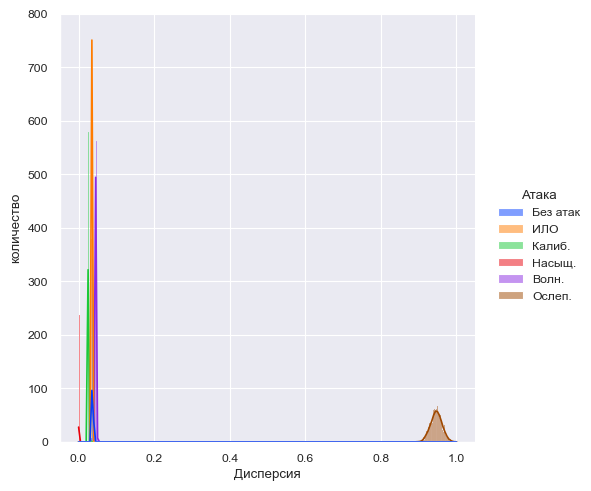

In [38]:
sns.set_style("darkgrid")
sns.set_context("paper")
# g = sns.FacetGrid(df, col='target')
# g.map(sns.histplot, "var")
g = sns.displot(data=df, x='var', hue='Атака', kde=True, palette="bright", legend=True)
g.set_axis_labels('Дисперсия', 'количество')


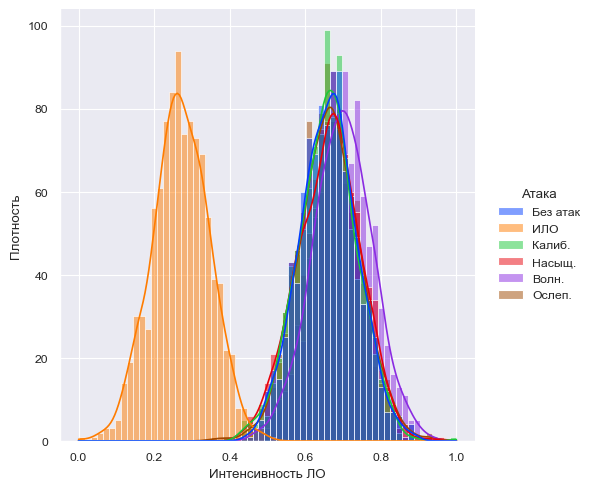

In [39]:
g = sns.displot(data=df, x='intensity_lo', hue='Атака', kde=True, palette="bright",legend=True)
g.set_axis_labels('Интенсивность ЛО', 'Плотность')

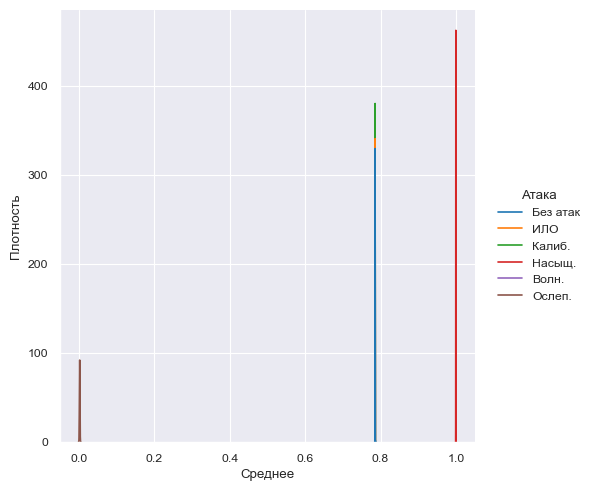

In [40]:
g = sns.displot(data=df, x='mean', hue='Атака', kind='kde', palette="tab10", legend=True)
g.set_axis_labels('Cреднее', 'Плотность')

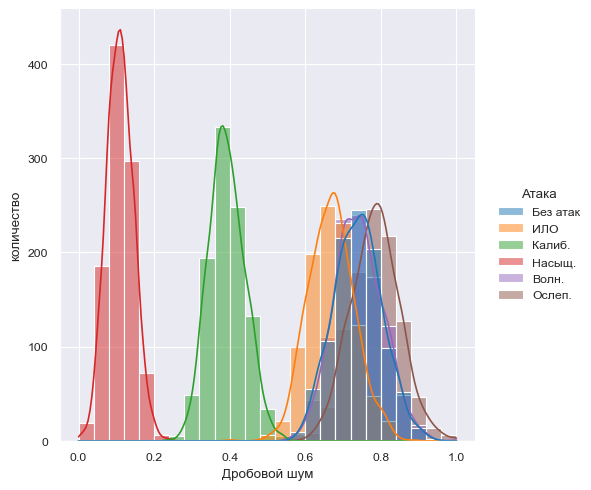

In [41]:

g = sns.displot(data=df, x='shot_noise', hue='Атака', kde=True, palette="tab10", legend=True)
g.set_axis_labels('Дробовой шум', 'количество')


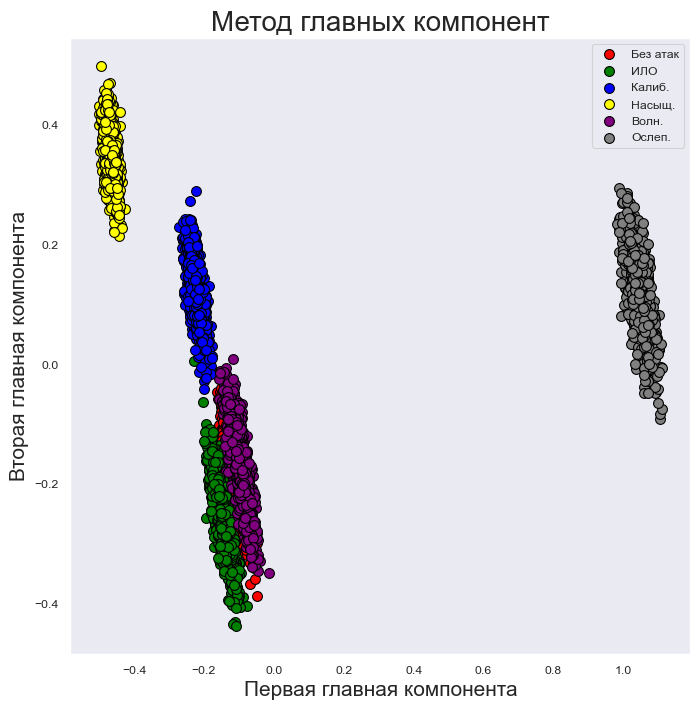

In [42]:
pca_df = dims_reduction(df=df, features=features, dims=2)
plot_pca(pca_df=pca_df, labels=labels)

In [43]:
from sklearn.model_selection import train_test_split

X = df.loc[:, features].values
y = df.loc[:,['Атака']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

print(f"Размер обучающей выборки: {X_train.shape}, размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (4200, 4), размер тестовой выборки: (1800, 4)


In [44]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [45]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred=y_pred, y_true=y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Наивный Байесовский классификатор")
print("Accuracy:", accuray)
print("F1 Score:", f1)

Наивный Байесовский классификатор
Accuracy: 0.9988888888888889
F1 Score: 0.9988888687162718


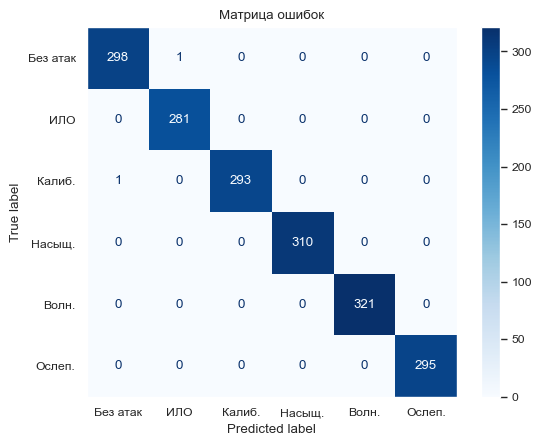

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=0)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')

plt.title('Матрица ошибок')
plt.grid(False)
plt.show()

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn_model = knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=knn_predictions)
f1 = f1_score(y_pred=knn_predictions, y_true=y_test, average="weighted")

print("K ближайших соседей")
print(f'Accuracy: {accuracy}')
print("F1 Score:", f1)

K ближайших соседей
Accuracy: 0.9411111111111111
F1 Score: 0.9411575301749479


c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


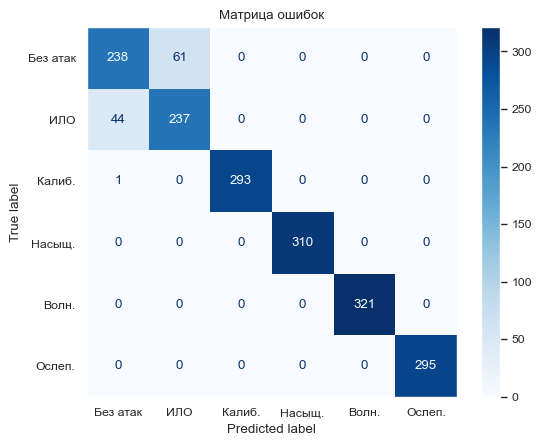

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=0)

cm = confusion_matrix(y_test, knn_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')

plt.title('Матрица ошибок')
plt.grid(False)
plt.show()

c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

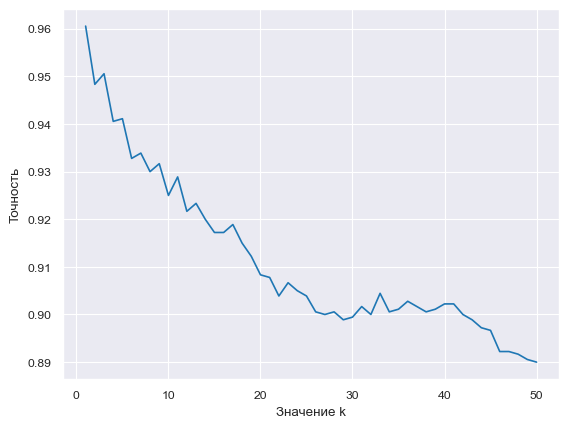

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# k-value range
k_values = range(1, 51, 1) 

data = {'k': [], 'accuracy': []}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    knn_predictions = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, knn_predictions)
    data['k'].append(k)
    data['accuracy'].append(accuracy)


df_k = pd.DataFrame(data)

sns.lineplot(data=df_k, x='k', y='accuracy')
plt.xlabel('Значение k')
plt.ylabel('Точность')
plt.grid(True)
plt.show()


Train a neural network model to classify attack types based on feature data.

Parameters:
- num_classes (int): Number of classes (types of attacks) to classify.
- encoder (LabelBinarizer): Encoder for transforming categorical labels into binary form.
- X (pandas.DataFrame): Features DataFrame excluding the 'Атака' column.
- y (pandas.Series): Categorical labels representing attack types.
- X_train (numpy.ndarray): Features training data.
- X_test (numpy.ndarray): Features test data.
- y_train (numpy.ndarray): Integer-encoded training labels.
- y_test (numpy.ndarray): Integer-encoded test labels.
- model (tensorflow.keras.Sequential): Sequential model for classification.
- history (tensorflow.keras.callbacks.History): Object storing training history.
- test_loss (float): Loss value on the test set.
- test_accuracy (float): Accuracy on the test set.

Explanation:
- 'num_classes' specifies the number of different attack types (classes) to classify.
- 'encoder' is used to convert categorical attack labels into a binary format suitable for model training.
- 'X' represents the features (independent variables) from the DataFrame 'df' excluding the 'Атака' column.
- 'y' is the categorical labels (attack types).
- 'X_train', 'X_test', 'y_train', 'y_test' are the training and test sets split from 'X' and 'y'.
- 'model' is a Sequential neural network model defined with dense layers for classification.
- 'history' stores the training history of the model during fitting.
- 'test_loss' and 'test_accuracy' hold the loss and accuracy metrics evaluated on the test set after training.



In [50]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

num_classes = 6
encoder = LabelBinarizer()

X = df.drop(['Атака'], axis=1)  # df features without labels
y = df['Атака'] # categorial labels
y = encoder.fit_transform(y) # binarized labels
y_int = np.argmax(y, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.2, random_state=41)

model = Sequential([
    Dense(4, input_shape=(X_train.shape[1],)),
    Dense(16, activation='tanh'),
    Dense(6, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Точность: {test_accuracy}')

Epoch 1/75


C:\Users\Loassar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4059 - loss: 1.6586 - val_accuracy: 0.5283 - val_loss: 1.3244
Epoch 2/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5606 - loss: 1.2506 - val_accuracy: 0.6475 - val_loss: 1.0112
Epoch 3/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6625 - loss: 0.9560 - val_accuracy: 0.7592 - val_loss: 0.7905
Epoch 4/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7596 - loss: 0.7545 - val_accuracy: 0.8117 - val_loss: 0.6396
Epoch 5/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8249 - loss: 0.6157 - val_accuracy: 0.8508 - val_loss: 0.5367
Epoch 6/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8480 - loss: 0.5125 - val_accuracy: 0.8458 - val_loss: 0.4631
Epoch 7/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8419 - loss: 0.4530 - val_accuracy: 0.8575 - val_loss: 0.4065
Epoch 8/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.4044 - val_accuracy: 0.8567 - val_

In [51]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Точность модели: {test_accuracy}')

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9508 - loss: 0.1261
Точность модели: 0.9458333253860474


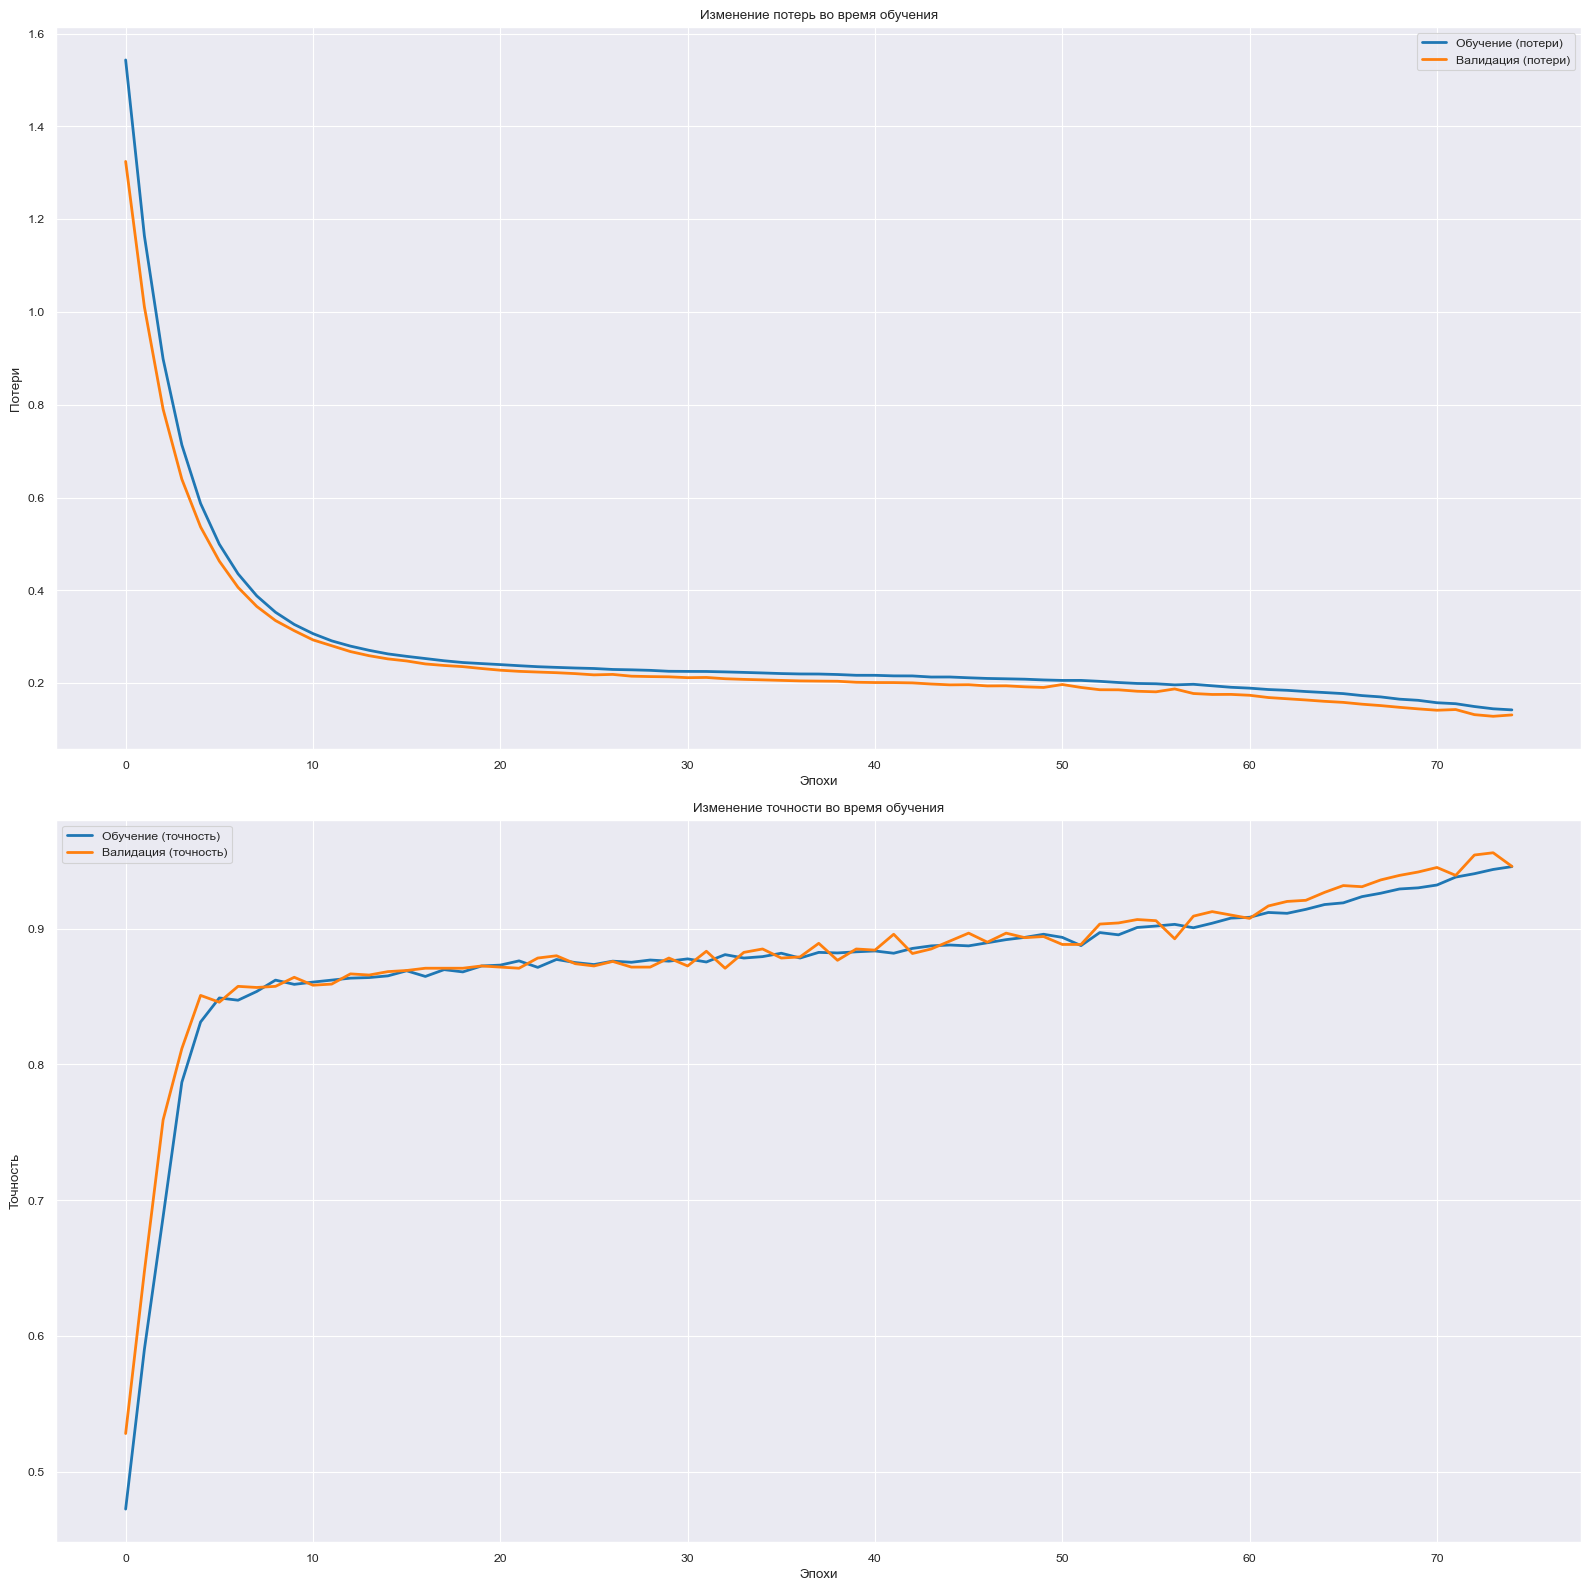

In [52]:
plt.figure(figsize=(16, 8 * 2))

# Loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Обучение (потери)', linewidth=2)
plt.plot(history.history['val_loss'], label='Валидация (потери)', linewidth=2)
plt.title('Изменение потерь во время обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Обучение (точность)', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Валидация (точность)', linewidth=2)
plt.title('Изменение точности во время обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


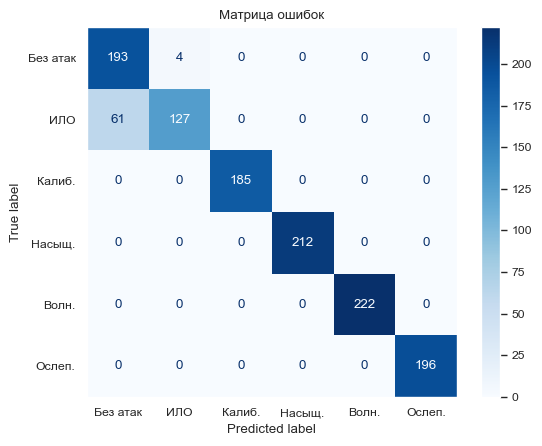

In [53]:
# predictions on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')

plt.title('Матрица ошибок')
plt.grid(False)
plt.show()

Defines a function to build a Keras Sequential model for hyperparameter tuning using Keras Tuner.

This function constructs a neural network with tunable parameters for input units, hidden units,
activation functions, and learning rate. It compiles the model using Adam optimizer and sparse
categorical crossentropy loss. The function is used within a RandomSearch tuner to find the optimal
hyperparameters based on validation accuracy.

Attributes:
    hp: HyperParameters object from Keras Tuner, used to define tunable parameters.
    
Returns:
    model: A compiled Keras Sequential model.

In [54]:

from keras import layers
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(layers.Dense(
        hp.Int('input_units', min_value=4, max_value=256, step=4),
        activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid']), input_dim=4))
    model.add(layers.Dense(
        hp.Int('hidden_units', min_value=4, max_value=256, step=4),
        activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid'])))
    model.add(layers.Dense(6, activation='softmax'))

    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=30,
    executions_per_trial=1,
    directory='my_dir',
    project_name='keras_tuner_demo')

tuner.search_space_summary()

# Searching
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Find optimal hyperparams
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('input_units')} and the optimal number of units in the second densely-connected
layer is {best_hps.get('hidden_units')}.
The optimal activation in the hidden layer is {best_hps.get('dense_activation')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

# Build and train a model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Results
eval_result = model.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

Trial 30 Complete [00h 00m 18s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 11m 07s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 188 and the optimal number of units in the second densely-connected
layer is 172.
The optimal activation in the hidden layer is relu.
The optimal learning rate for the optimizer is 0.006866194145459349.

Epoch 1/50


C:\Users\Loassar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7129 - loss: 0.7116 - val_accuracy: 0.8433 - val_loss: 0.2443
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8469 - loss: 0.2578 - val_accuracy: 0.8708 - val_loss: 0.2199
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8558 - loss: 0.2458 - val_accuracy: 0.8350 - val_loss: 0.3178
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.2602 - val_accuracy: 0.8625 - val_loss: 0.2554
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8825 - loss: 0.2220 - val_accuracy: 0.9033 - val_loss: 0.1893
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8893 - loss: 0.2174 - val_accuracy: 0.9233 - val_loss: 0.1600
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8922 - loss: 0.2120 - val_accuracy: 0.9408 - val_loss: 0.1450
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9258 - loss: 0.1635 - val_accuracy: 0.9417 - val_